# Deep Learning Regression with Admissions Data

## 1. Project Goal

#### In this project, I will develop a deep learning regression that predicts the probability (0 to 1) that a students will be accepted to graduate schools based on application factors 

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
    

## 2. Dataset 

#### The dataset is from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv) containing information about 500 applicants from various universities and their chance of getting admitted

In [79]:
admission = pd.read_csv('admissions_data.csv')

In [80]:
admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


The Dataset includes nine different columns as below:

* Serial No.: Index of each row (1-500)
* GRE Score: GRE test score (out of 340)
* TOEFL Score: TOEFL test score (out of 120)
* University Rating: Evaluated university rating (out of 5)
* SOP: Statement of Purpose Strength (out of 5)
* LOR: Letter of Recommendation Strength (out of 5)
* CGPA: Undergraduate GPA (out of 10)
* Research: Has research experience (either 0 or 1)
* Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)

## 3. Implementing Deep Learning 

### a. Preprocessing Data for learning

 (1) Separating features from labels using array slicing

In [81]:
#drop the first column (serial No.)
admission = admission.drop(columns = ['Serial No.'])

#Choose all columns except for last column for features
features = admission.iloc[:,0:-1]

#Choose the last column for labels
labels = admission.iloc[:,-1]

 (2) Splitting the data into training and test sets (test_size = 0.33)

In [82]:
#split the data into training and test sets 
feature_train,feature_test,label_train,label_test = train_test_split(features,labels,test_size=0.33, random_state =42)

 (3) Standardize the numerical features 

In [83]:
#standardize the numeric columns using Columntransformer
ct = ColumnTransformer([('standardize', StandardScaler(),[True,True,True,True,True,True,True])])
features_train_scale=ct.fit_transform(feature_train)
features_test_scale = ct.fit_transform(feature_test)

### b. Designing a Sequential model 

 (1) Creating input, output and hidden layers  

In [84]:
#create a Sequential object
my_model = Sequential()

#create input layers
input = InputLayer(input_shape = (features.shape[1],))

#add the input layer
my_model.add(input)

#add a hidden layer with 200 neurons
my_model.add(Dense(200,activation = 'relu'))

#add an output layer
my_model.add(Dense(1))

 (2) Choosing a learning rate hyperparameter using an optimizer: Adam

In [85]:
opt = Adam(learning_rate = .01)
my_model.compile(loss='mse',metrics=['mae'],optimizer=opt)

 (3) Applying early stopping for efficiency

In [95]:
stop = EarlyStopping(monitor = 'val_loss',mode='min',patience = 40)

### c. Training the Model

In [97]:
#Train the model
history=my_model.fit(features_train_scale,label_train,epochs=50,batch_size=10,verbose=1,validation_split=.2,callbacks=[stop])

Epoch 1/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0446 - val_loss: 0.0022 - val_mae: 0.0336
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0449 - val_loss: 0.0021 - val_mae: 0.0338
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0443 - val_loss: 0.0023 - val_mae: 0.0369
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0433 - val_loss: 0.0024 - val_mae: 0.0376
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0457 - val_loss: 0.0023 - val_mae: 0.0365
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0446 - val_loss: 0.0021 - val_mae: 0.0336
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0429 - val_loss: 0.0025 - val_mae: 0.0394
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.04

### d. Evaluating the model 

In [98]:
#evaluate the model
val_mse, val_mae = my_model.evaluate(features_test_scale,label_test,verbose=0)

In [100]:
#find MAE and MSE
print('MAE: ', val_mae,'MSE: ',val_mse)

MAE:  0.04374029114842415 MSE:  0.004027482122182846


The mean absolute error is .043 which means that the model is off by 4.3%. 

In [101]:
#evaluate r-sqaured for the mode

In [102]:
y_predict = my_model.predict(features_test_scale)

In [104]:
print(r2_score(label_test,y_predict))

0.8045234220794694


$r^2$ is 0.80, indicating that 80% of the variation in the chance of admission is explained by the model. 

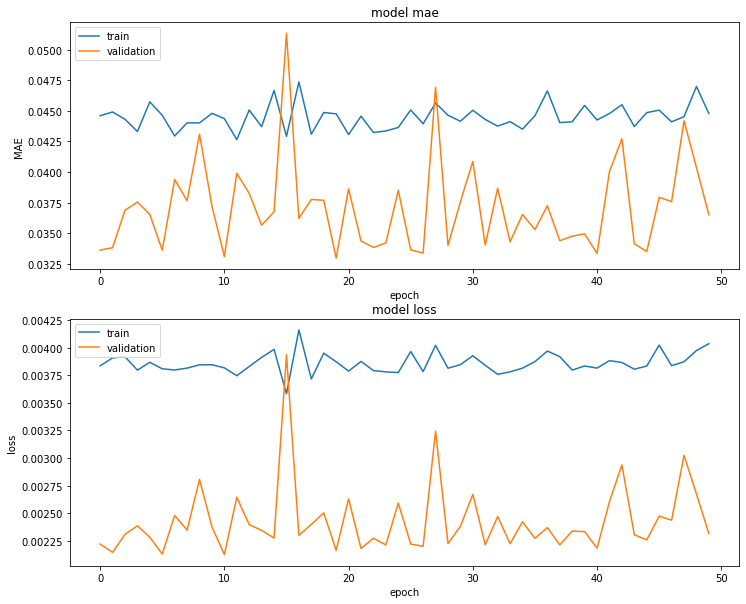

In [112]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

## 4. Hyperparameter Tuning

In order to refine the model further, I will tweak our hyperparameters that include: 

* Learning rate
* batch size
* number of epochs
* model size

In [90]:
def do_randomized_search():
  param_grid = {'batch_size': sp_randint(2, 16), 'nb_epoch': sp_randint(10, 100)}
  model = KerasRegressor(build_fn=my_model)
  grid = RandomizedSearchCV(estimator = model, param_distributions=param_grid, scoring = make_scorer(mean_squared_error, greater_is_better=False), n_iter = 12)
  grid_result = grid.fit(features_train, label_train, verbose = 0)
  print(grid_result)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

print("-------------- RANDOMIZED SEARCH --------------------")
do_randomized_search()

-------------- RANDOMIZED SEARCH --------------------


NameError: name 'features_train' is not defined